In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)



In [2]:
MainDF = pd.read_csv('MainDF.csv')

In [377]:
MainDF.shape

(8045, 31)

In [5]:
MainDF.head()

,Year_x,Player,Tm,Pos,Age,G,GS,MP,PER,AST,...,FG%,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,year_start,year_end,career
0,1997,Mahmoud Abdul-Rauf,SAC,PG,27.0,75.0,51.0,2131.0,13.2,189.0,...,0.445,13.746667,28.413333,92.53,188.0,83.0,15604.0,1991,2001,7
1,1998,Mahmoud Abdul-Rauf,SAC,PG,28.0,31.0,0.0,530.0,10.5,58.0,...,0.377,7.322581,17.096774,93.79,188.0,83.0,15604.0,1991,2001,8
2,2001,Mahmoud Abdul-Rauf,VAN,PG,31.0,41.0,0.0,486.0,16.7,76.0,...,0.488,6.487805,11.853659,93.05,188.0,83.0,15604.0,1991,2001,11
3,1997,Duane Causwell,SAC,C,28.0,46.0,8.0,581.0,8.9,20.0,...,0.511,2.565217,12.630435,92.53,213.0,108.0,23004.0,1991,2001,7
4,1998,Duane Causwell,MIA,C,29.0,37.0,2.0,363.0,9.2,5.0,...,0.416,2.405405,9.810811,89.37,213.0,108.0,23004.0,1991,2001,8


# Attempting basic linear regression to predict PPG only based on MPG

In [3]:
y = MainDF.PPG
x = MainDF.MPG
df = pd.DataFrame(columns=['PPG', 'MPG'])
df.PPG = y
df.MPG = x
import statsmodels.api as sm

In [4]:
all_data = ols(formula = 'PPG~MPG', data = df).fit()
all_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 2.971e+04
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:15:24   Log-Likelihood:                -19137.
No. Observations:                8045   AIC:                         3.828e+04
Df Residuals:                    8043   BIC:                         3.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2830      0.077    -42.752      0.000      -3.434      -3.132
MPG            0.5429      0.003    172.361      0.000       0.537       0.549
==============================================================================
Omnibus:                     1047.694   Durbin-Watson:                   0.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3424.511
Skew:                           0.663   Prob(JB):                         0.00
Kurtosis:                       5.908   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Right now the R-squared is pretty good but the F-stat is also very high. Time to add some more predictors!

In [11]:
MainDF.corr()

,Year_x,Age,G,GS,MP,PER,AST,TOV,STL,BLK,TRB,PTS,FG%,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,year_start,year_end,career
Year_x,1.000000,-0.057024,-0.004593,-0.000693,-0.017712,0.038661,0.003086,-0.038981,-0.038802,-0.012248,0.003435,0.030220,0.073872,0.042490,-0.018821,0.407553,0.022757,0.066640,0.056450,0.829492,0.819157,0.026750
Age,-0.057024,1.000000,-0.054717,-0.007870,-0.026958,-0.074602,0.023656,-0.093362,-0.039383,-0.098551,-0.052329,-0.078328,-0.047943,-0.061306,0.022401,-0.089890,-0.044789,-0.085502,-0.078205,-0.552522,-0.306060,0.902724
G,-0.004593,-0.054717,1.000000,0.566626,0.808512,0.340610,0.479944,0.643412,0.641147,0.404347,0.626321,0.657557,0.226734,0.392933,0.467723,0.017601,0.013437,0.020708,0.018502,-0.000613,0.166078,-0.005845
GS,-0.000693,-0.007870,0.566626,1.000000,0.850223,0.503713,0.596349,0.749707,0.690284,0.453189,0.695128,0.778117,0.241793,0.703170,0.802618,0.010338,0.050636,0.053426,0.054563,-0.052652,0.179869,0.093190
MP,-0.017712,-0.026958,0.808512,0.850223,1.000000,0.571486,0.693921,0.867227,0.826722,0.447538,0.749767,0.911953,0.230703,0.775841,0.864820,0.005773,-0.031188,-0.029665,-0.033430,-0.057067,0.210343,0.075370
PER,0.038661,-0.074602,0.340610,0.503713,0.571486,1.000000,0.483260,0.607572,0.525534,0.415270,0.585182,0.717109,0.547124,0.772764,0.620899,0.042929,0.075308,0.101192,0.099606,0.011281,0.245672,0.038241
AST,0.003086,0.023656,0.479944,0.596349,0.693921,0.483260,1.000000,0.809354,0.749993,0.038688,0.289250,0.679947,-0.011825,0.615453,0.645523,0.034622,-0.369223,-0.317919,-0.342210,-0.049896,0.158216,0.093968
TOV,-0.038981,-0.093362,0.643412,0.749707,0.867227,0.607572,0.809354,1.000000,0.785537,0.356089,0.630563,0.889409,0.170876,0.802001,0.782506,0.037134,-0.101635,-0.057249,-0.071312,-0.044142,0.191463,0.020090
STL,-0.038802,-0.039383,0.641147,0.690284,0.826722,0.525534,0.749993,0.785537,1.000000,0.253472,0.524483,0.762019,0.093060,0.657404,0.729837,0.044702,-0.204699,-0.193437,-0.206661,-0.055117,0.160173,0.040003
BLK,-0.012248,-0.098551,0.404347,0.453189,0.447538,0.415270,0.038688,0.356089,0.253472,1.000000,0.741566,0.380605,0.424770,0.297064,0.357174,0.015739,0.449339,0.400284,0.431968,-0.002155,0.147979,-0.014656


In [5]:
#New df with some columns removed
correlationDF = MainDF.drop(['G', 'GS', 'PER', 'AST', 'TOV', 'STL', 'BLK', 'TRB', 'PTS', 'FG%', 'year_start', 'year_end'], axis = 1)

In [13]:
correlationDF.head()

,Year_x,Player,Tm,Pos,Age,MP,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,career
0,1997,Mahmoud Abdul-Rauf,SAC,PG,27.0,2131.0,13.746667,28.413333,92.53,188.0,83.0,15604.0,7
1,1998,Mahmoud Abdul-Rauf,SAC,PG,28.0,530.0,7.322581,17.096774,93.79,188.0,83.0,15604.0,8
2,2001,Mahmoud Abdul-Rauf,VAN,PG,31.0,486.0,6.487805,11.853659,93.05,188.0,83.0,15604.0,11
3,1997,Duane Causwell,SAC,C,28.0,581.0,2.565217,12.630435,92.53,213.0,108.0,23004.0,7
4,1998,Duane Causwell,MIA,C,29.0,363.0,2.405405,9.810811,89.37,213.0,108.0,23004.0,8


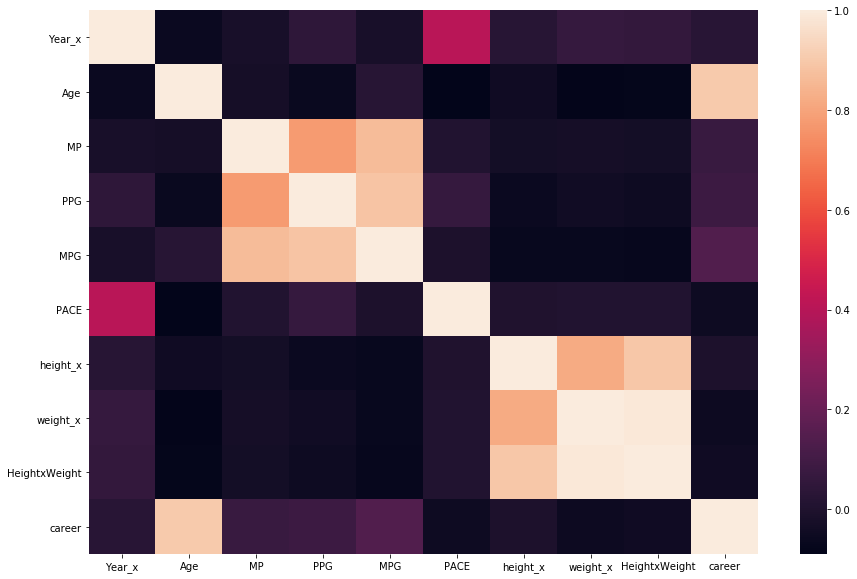

In [7]:
plt.figure(figsize = (15,10))
sns.heatmap(correlationDF.corr())
#high correlations between PPG and MPG, height and weight, age x career 

Text(0.5, 1.0, 'Distribution of PPG')

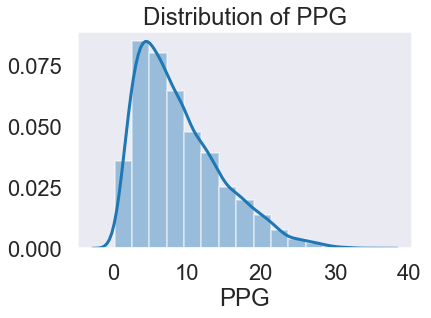

In [337]:
sns.distplot(correlationDF.PPG, bins= 15)
plt.title('Distribution of PPG')

Text(0.5, 1.0, 'Distribution of MPG')

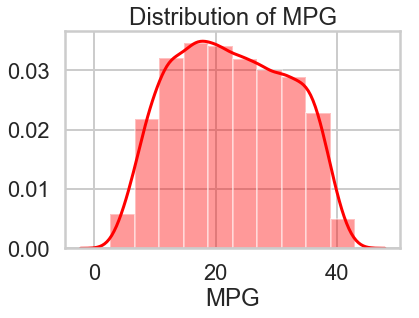

In [102]:
sns.distplot(correlationDF.MPG, bins = 10, color = 'red')
plt.title("Distribution of MPG") #Very platykurtic

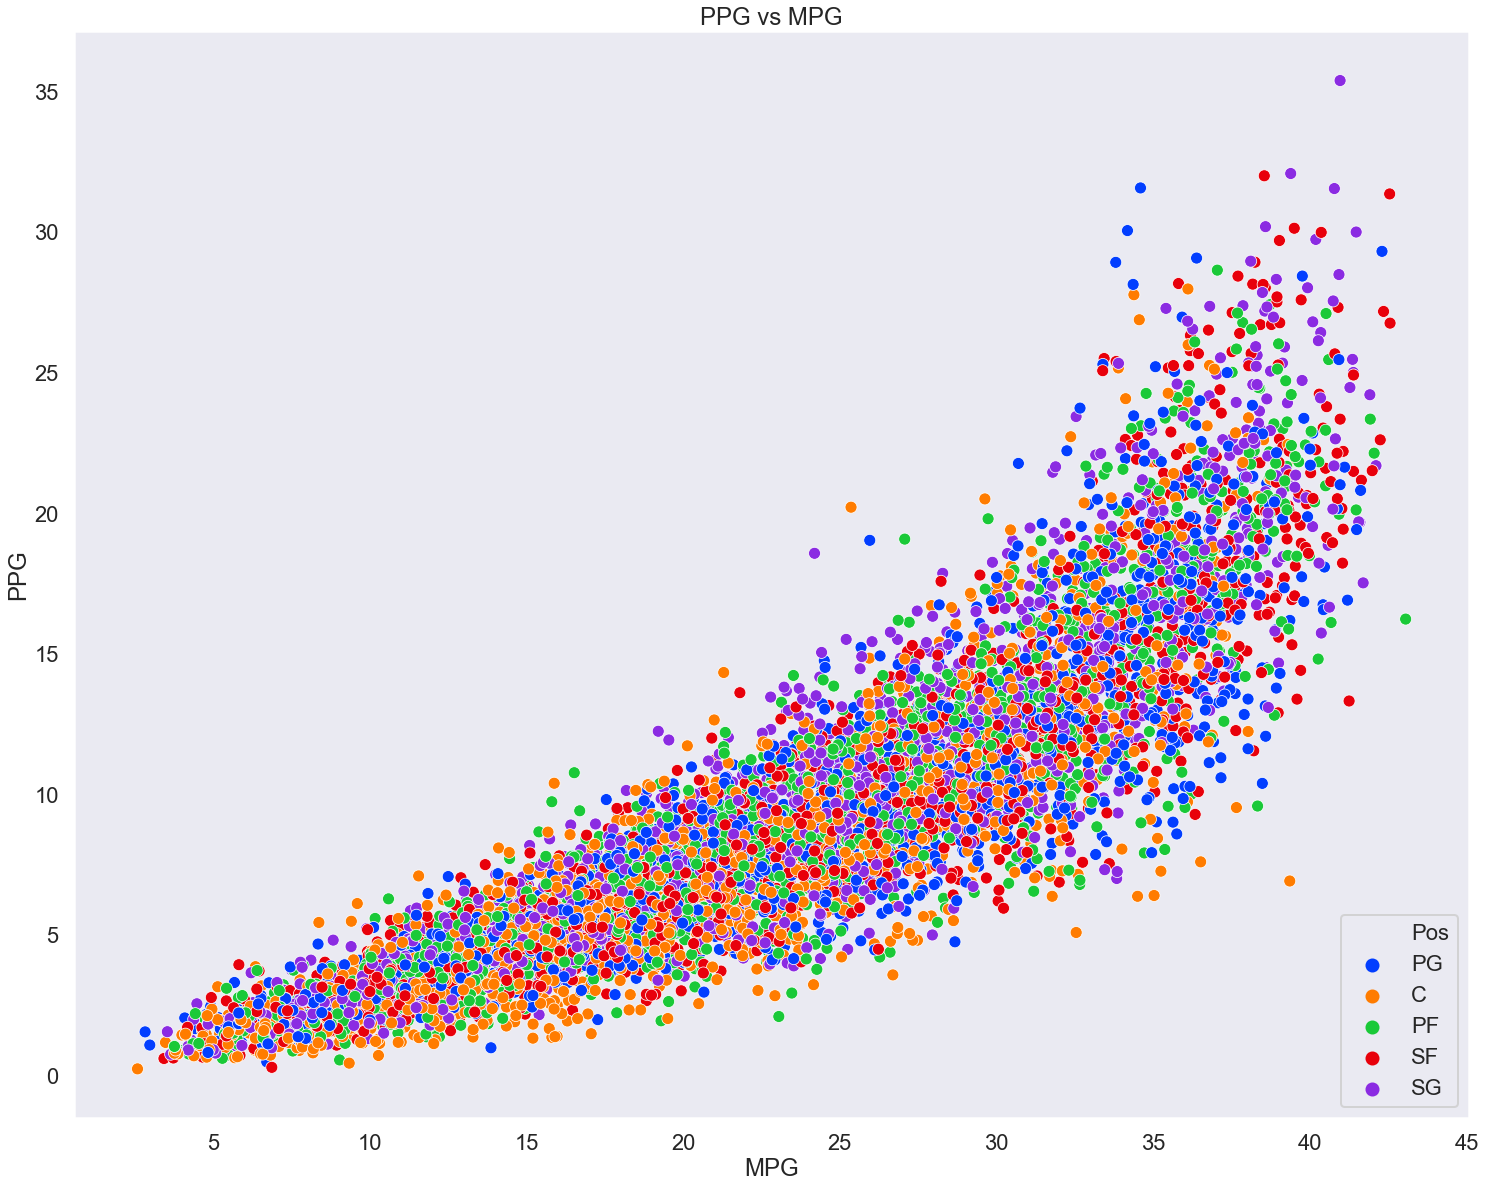

In [111]:
sns.set_style('dark')
sns.set_context("poster")
plt.figure(figsize = (25,20))
sns.scatterplot(correlationDF.MPG, correlationDF.PPG, hue = correlationDF.Pos, palette = 'bright') #hue used for categorical values 
plt.title('PPG vs MPG')
plt.legend(loc='lower right')

In [142]:
correlationDF.columns

Index(['Year_x', 'Player', 'Tm', 'Pos', 'Age', 'MP', 'PPG', 'MPG', 'PACE',
       'height_x', 'weight_x', 'HeightxWeight', 'career'],
      dtype='object')

In [185]:
#getting pace of each year
pace_medians = []
for year in list(range(1997,2018)):

    pace_medians.append(correlationDF.loc[correlationDF['Year_x'] == year, ['PACE']].median()[0])
pace_medians

[91.93,
 91.5,
 90.82,
 94.76,
 92.94,
 91.54,
 92.6,
 91.35,
 92.15,
 92.07,
 92.93,
 92.81,
 92.7,
 93.54,
 93.35,
 92.26,
 92.5,
 94.32,
 94.66,
 96.63,
 96.78]

No handles with labels found to put in legend.


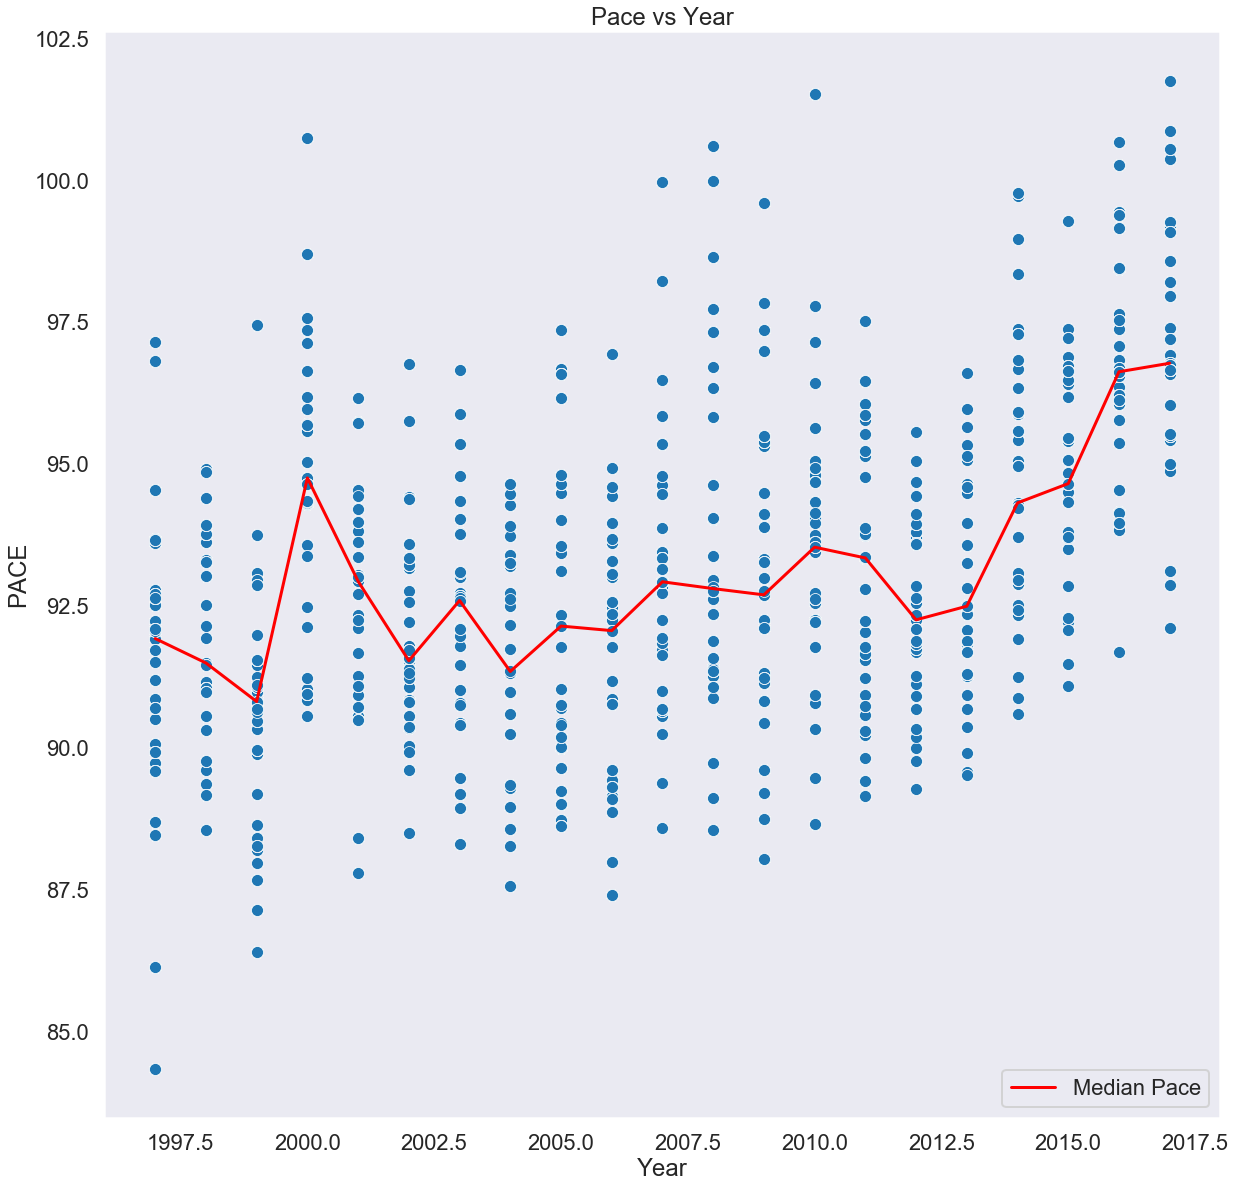

In [190]:
sns.set_style('dark')
sns.set_context("poster")
plt.figure(figsize = (20,20))
sns.scatterplot(correlationDF.Year_x, correlationDF.PACE) #palette = 'dark')
plt.legend(loc='lower right')
plt.xlabel('Year')
plt.title('Pace vs Year')

plt.plot(list(range(1997,2018)), pace_medians, 'r-', label = 'Median Pace')

plt.legend(loc = 'lower right')

#What can be seen here, is a general increase in pace over this 20 year period. However, there is a lot of variance with every year.
#Red line shows median of each year 
#What explains uptick in 2000, there was a lockout in 1999, and players were out of shape, so going back to 2000, it increased a lot.
#Every team only played 50 games that year
#Other things: defensive 3 second violation introduced in 2001, and handchecking introduced in 2004-05.
#Something to take into account later. 


C:\Users\ar344\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Pace')

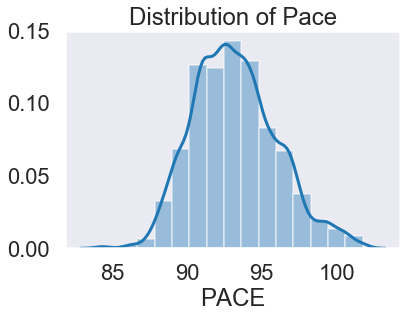

In [126]:
sns.distplot(MainDF.PACE, bins = 15)
plt.title('Distribution of Pace')

In [ ]:
#Adding new predictors.
#Interaction between height and weight 
#Team Pace 
#Position 
#Age and what phase in career 

In [130]:
correlationDF.head()

,Year_x,Player,Tm,Pos,Age,MP,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,career
0,1997,Mahmoud Abdul-Rauf,SAC,PG,27.0,2131.0,13.746667,28.413333,92.53,188.0,83.0,15604.0,7
1,1998,Mahmoud Abdul-Rauf,SAC,PG,28.0,530.0,7.322581,17.096774,93.79,188.0,83.0,15604.0,8
2,2001,Mahmoud Abdul-Rauf,VAN,PG,31.0,486.0,6.487805,11.853659,93.05,188.0,83.0,15604.0,11
3,1997,Duane Causwell,SAC,C,28.0,581.0,2.565217,12.630435,92.53,213.0,108.0,23004.0,7
4,1998,Duane Causwell,MIA,C,29.0,363.0,2.405405,9.810811,89.37,213.0,108.0,23004.0,8


# Multiple Linear Regression

In [218]:
X = MainDF
mlr_ppg = ols(formula = 'PPG~MPG+PACE+HeightxWeight', data = X).fit()
mlr_ppg.summary()
#Adding just the interaction between height and weight, and pace, increased the Rsquared from .787 to .792
#Not a huge difference, but P values tell us these variables are distinct 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 1.021e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:36:43   Log-Likelihood:                -19039.
No. Observations:                8045   AIC:                         3.809e+04
Df Residuals:                    8041   BIC:                         3.811e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -16.9407      0.974    -17.390      0.000     -18.850     -15.031
MPG               0.5439      0.003    174.301      0.000       0.538       0.550
PACE              0.1406      0.010     13.728      0.000       0.121       0.161
HeightxWeight  2.653e-05    8.8e-06      3.013      0.003    9.27e-06    4.38e-05
==============================================================================
Omnibus:                      968.585   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3015.197
Skew:                           0.627   Prob(JB):                         0.00
Kurtosis:                       5.724   Cond. No.                     6.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
correlationDF.describe()

,Year_x,Age,MP,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,career
count,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000
mean,2007.420634,26.848104,1387.782971,8.964778,22.559549,93.198377,200.437663,98.651833,19869.032194,5.972654
std,6.000130,4.221938,826.601637,5.657212,9.243756,2.808036,9.351950,12.445724,3276.068725,3.969958
min,1997.000000,18.000000,62.000000,0.250000,2.583333,84.350000,160.000000,61.000000,9760.000000,1.000000
25%,2002.000000,24.000000,680.000000,4.526316,15.000000,91.140000,193.000000,90.000000,17100.000000,3.000000
50%,2008.000000,26.000000,1287.000000,7.666667,22.222222,92.970000,201.000000,99.000000,19899.000000,5.000000
75%,2013.000000,30.000000,2025.000000,12.239130,30.256410,94.930000,208.000000,108.000000,22248.000000,9.000000
max,2017.000000,42.000000,3464.000000,35.400000,43.054795,101.760000,231.000000,149.000000,32928.000000,21.000000


C:\Users\ar344\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


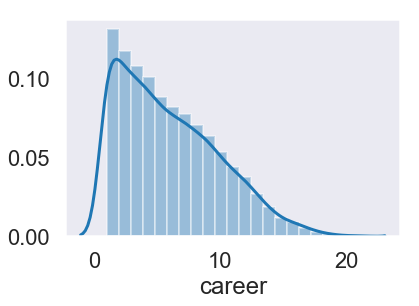

In [199]:
sns.distplot(correlationDF.career, bins = 21) #Distribution of career lengths 

In [10]:
#Looking at this distrubtion going to create an interaction between age and career
MainDF['agexcareer'] = MainDF.Age * MainDF.career

In [223]:
X = MainDF
mlr_ppg = ols(formula = 'PPG~MPG+PACE+HeightxWeight+agexcareer', data = X).fit()
mlr_ppg.summary()
#now having added an interaction between agexcareer, the rsquared value has barely changed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     7769.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:39:46   Log-Likelihood:                -18992.
No. Observations:                8045   AIC:                         3.799e+04
Df Residuals:                    8040   BIC:                         3.803e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -16.0242      0.973    -16.465      0.000     -17.932     -14.116
MPG               0.5466      0.003    175.466      0.000       0.540       0.553
PACE              0.1347      0.010     13.199      0.000       0.115       0.155
HeightxWeight  2.272e-05   8.76e-06      2.592      0.010    5.54e-06    3.99e-05
agexcareer       -0.0020      0.000     -9.677      0.000      -0.002      -0.002
==============================================================================
Omnibus:                     1045.873   Durbin-Watson:                   0.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3256.485
Skew:                           0.676   Prob(JB):                         0.00
Kurtosis:                       5.808   Cond. No.                     6.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
pos_dummies = pd.get_dummies(MainDF.Pos)

In [13]:
MainDF = pd.concat([MainDF, pos_dummies], axis = 1)
MainDF.head(2)

,Year_x,Player,Tm,Pos,Age,G,GS,MP,PER,AST,TOV,STL,BLK,TRB,PTS,FG%,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,year_start,year_end,career,agexcareer,C,PF,PG,SF,SG
0,1997,Mahmoud Abdul-Rauf,SAC,PG,27.0,75.0,51.0,2131.0,13.2,189.0,119.0,56.0,6.0,122.0,1031.0,0.445,13.746667,28.413333,92.53,188.0,83.0,15604.0,1991,2001,7,189.0,0,0,1,0,0
1,1998,Mahmoud Abdul-Rauf,SAC,PG,28.0,31.0,0.0,530.0,10.5,58.0,19.0,16.0,1.0,37.0,227.0,0.377,7.322581,17.096774,93.79,188.0,83.0,15604.0,1991,2001,8,224.0,0,0,1,0,0


In [14]:
X = MainDF
mlr_ppg = ols(formula = 'PPG~MPG+PACE+HeightxWeight+agexcareer+PG+SG+SF+PF', data = X).fit()
mlr_ppg.summary()
#R squared went up further up to 0.798. Still not a huge change. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     3961.
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:31:10   Log-Likelihood:                -18928.
No. Observations:                8045   AIC:                         3.787e+04
Df Residuals:                    8036   BIC:                         3.794e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -18.0217      1.004    -17.942      0.000     -19.991     -16.053
MPG               0.5418      0.003    172.985      0.000       0.536       0.548
PACE              0.1332      0.010     13.147      0.000       0.113       0.153
HeightxWeight  9.923e-05   1.42e-05      6.998      0.000    7.14e-05       0.000
agexcareer       -0.0018      0.000     -8.898      0.000      -0.002      -0.001
PG                0.8350      0.137      6.102      0.000       0.567       1.103
SG                1.2904      0.120     10.766      0.000       1.055       1.525
SF                0.7201      0.107      6.758      0.000       0.511       0.929
PF                0.6634      0.092      7.195      0.000       0.483       0.844
==============================================================================
Omnibus:                     1030.782   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3094.217
Skew:                           0.678   Prob(JB):                         0.00
Kurtosis:                       5.719   Cond. No.                     7.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
yint = -3.28
mpg_coef = 0.5418 
pace_coef = 0.1332
ht_wt_coef = 9.923/(10**5)
agecr_coef = -0.0018
pg_coef = 0.8350 
sg_coef = 1.2904
sf_coef = 0.7201
pf_coef = 0.6634
predictionformog = mpg_coef*correlationDF.MPG +yint

In [296]:
predictionformog.shape

(8045,)

In [270]:
predictionform1

0       11.740825
1        5.714345
2        2.564457
3        3.076352
4        1.062968
5       -0.134525
6        2.116260
7        6.906816
8        1.773213
9        3.019305
10      10.890880
11      14.117886
12      14.073116
13       8.197919
14      14.062678
15      13.339459
16      13.141123
17      12.085116
18       4.916548
19       2.927067
20       3.690265
21       3.290183
22       3.060918
23       5.585122
24      13.103158
25      13.142223
26       7.536239
27       8.066657
28       6.435489
29      14.915080
          ...    
8015     4.290740
8016     5.616626
8017     0.340202
8018     8.323046
8019     4.933630
8020     5.212027
8021    10.913327
8022    10.923614
8023    13.504413
8024     3.080317
8025     8.071947
8026     9.767254
8027    13.509395
8028     6.059786
8029     3.968691
8030     6.404428
8031     5.710143
8032     8.864792
8033    -0.533104
8034     2.968626
8035     6.278763
8036     6.133086
8037     2.839175
8038     8.929590
8039    10

In [372]:
import numpy as np
tens = 10*np.ones(8045)
twenties = 2*tens

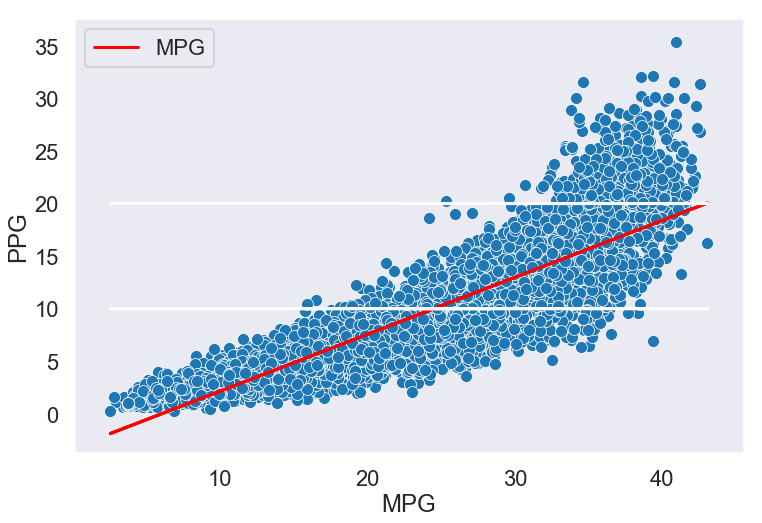

In [373]:
plt.figure(figsize = (12,8))
plt.plot(correlationDF.MPG, predictionformog, '-r')
sns.scatterplot(correlationDF.MPG, correlationDF.PPG) #this is first model 
plt.plot(correlationDF.MPG, tens, '-w')
plt.plot(correlationDF.MPG, twenties, '-w')

In [15]:
yint = -18.0217
mpg_coef = 0.5418 
pace_coef = 0.1332
ht_wt_coef = 9.923/(10**5)
agecr_coef = -0.0018
pg_coef = 0.8350 
sg_coef = 1.2904
sf_coef = 0.7201
pf_coef = 0.6634
predictionform1 = yint+ mpg_coef*MainDF.MPG + pace_coef*MainDF.PACE + ht_wt_coef*MainDF.HeightxWeight + agecr_coef*MainDF.agexcareer+ pg_coef*MainDF.PG+sg_coef*MainDF.SG+sf_coef*MainDF.SF + pf_coef*MainDF.PF

In [299]:
predictionform1.shape #these are the values for the predicted values of y

(8045,)

In [16]:
ypred = predictionform1

In [17]:
residuals = ypred - MainDF.PPG

Text(0, 0.5, 'Residuals')

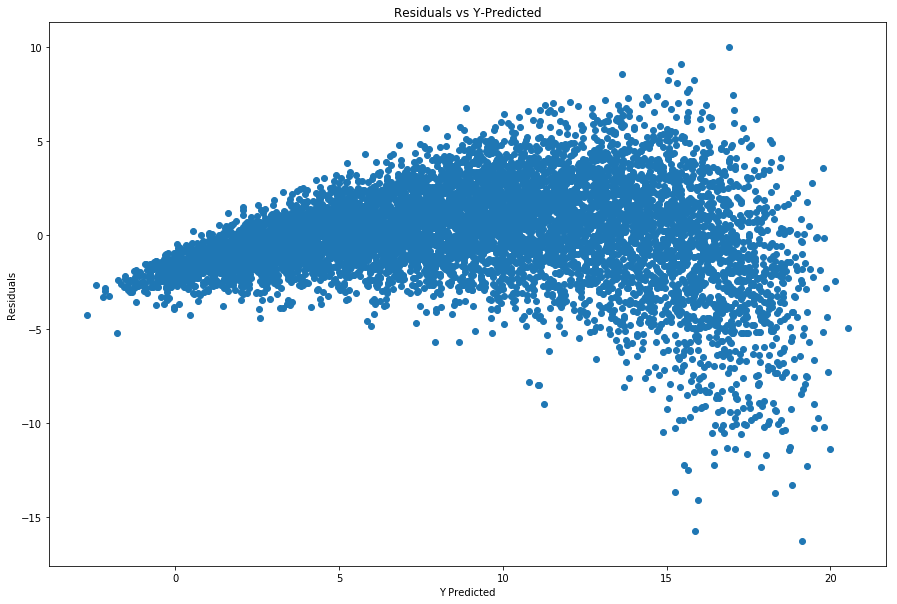

In [27]:
plt.figure(figsize = (15,10))
plt.scatter(ypred, residuals)
plt.title('Residuals vs Y-Predicted')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [281]:
type(predictionformog)

pandas.core.series.Series

In [282]:
type(predictionform1)

pandas.core.series.Series

In [302]:
correlationDF['predPPG'] = predictionform1#created new column with predicted data

,Year_x,Player,Tm,Pos,Age,MP,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,career,C,PF,PG,SF,SG,predPPG
0,1997,Mahmoud Abdul-Rauf,SAC,PG,27.0,2131.0,13.746667,28.413333,92.53,188.0,83.0,15604.0,7,0,0,1,0,0,11.740825


In [328]:
ppg10DF = MainDF.loc[MainDF['PPG']>10] #created a new column with players that only scored over 10

In [329]:
ppg10DF.shape

(2856, 31)

C:\Users\ar344\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'PPG Distribution')

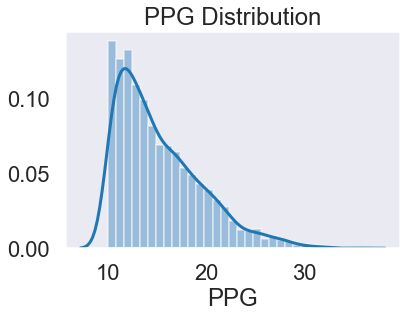

In [350]:
sns.distplot(ppg10DF.PPG)
plt.title('PPG Distribution') #Distribution for players socring more than 10

In [330]:
X = ppg10DF
mlr_ppg10 = ols(formula = 'PPG~MPG+PACE+HeightxWeight+agexcareer+PG+SG+SF+PF', data = X).fit()
mlr_ppg10.summary()
#Looking at players that scored over a 10ppg. 
#The predictive power of mpg does down, while the predictive power of all the other predictors went up. 
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     384.6
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        06:26:49   Log-Likelihood:                -7143.6
No. Observations:                2856   AIC:                         1.431e+04
Df Residuals:                    2847   BIC:                         1.436e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -33.1210      2.061    -16.069      0.000     -37.163     -29.079
MPG               0.6275      0.012     53.230      0.000       0.604       0.651
PACE              0.2372      0.020     12.053      0.000       0.199       0.276
HeightxWeight     0.0002   2.92e-05      8.397      0.000       0.000       0.000
agexcareer        0.0006      0.000      1.309      0.191      -0.000       0.001
PG                1.4393      0.294      4.896      0.000       0.863       2.016
SG                2.0420      0.255      7.999      0.000       1.541       2.543
SF                1.0681      0.229      4.655      0.000       0.618       1.518
PF                0.7660      0.204      3.762      0.000       0.367       1.165
==============================================================================
Omnibus:                      192.357   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.199
Skew:                           0.566   Prob(JB):                     6.41e-61
Kurtosis:                       4.024   Cond. No.                     7.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\ar344\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


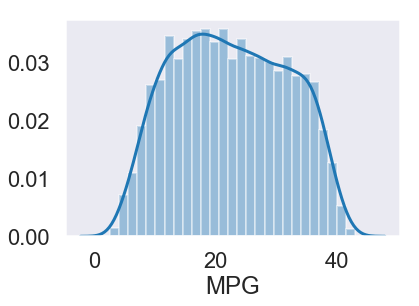

In [320]:
sns.distplot(correlationDF.MPG)

In [359]:
ppg10_mpg20 = ppg10DF.loc[ppg10DF['MPG'] > 20]

In [360]:
A = ppg10_mpg20
mlr_ppg10_mpg20 = ols(formula = 'PPG~MPG+PACE+HeightxWeight+agexcareer+PG+SG+SF+PF', data = A).fit()
mlr_ppg10_mpg20.summary()
#this is where ppg > 10 and mpg>20

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     381.5
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:21:37   Log-Likelihood:                -7103.4
No. Observations:                2840   AIC:                         1.422e+04
Df Residuals:                    2831   BIC:                         1.428e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -33.0958      2.067    -16.010      0.000     -37.149     -29.043
MPG               0.6367      0.012     52.937      0.000       0.613       0.660
PACE              0.2343      0.020     11.860      0.000       0.196       0.273
HeightxWeight     0.0002   2.94e-05      8.251      0.000       0.000       0.000
agexcareer        0.0006      0.000      1.207      0.227      -0.000       0.001
PG                1.4376      0.295      4.871      0.000       0.859       2.016
SG                2.0374      0.256      7.950      0.000       1.535       2.540
SF                1.0769      0.230      4.677      0.000       0.625       1.528
PF                0.7775      0.204      3.803      0.000       0.377       1.178
==============================================================================
Omnibus:                      189.043   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.317
Skew:                           0.561   Prob(JB):                     7.36e-60
Kurtosis:                       4.021   Cond. No.                     7.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [334]:
mpg20 = MainDF.loc[MainDF['MPG']>20]

In [335]:
X = mpg20
mlr_mpg20ppg = ols(formula = 'PPG~MPG+PACE+HeightxWeight+agexcareer+PG+SG+SF+PF', data = X).fit()
mlr_mpg20ppg.summary() 
#this is looking at a regression when accoutning for players that player 20 minutes of more.
#The coefficients by position and pace increased, as well as heightxweight.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1149.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        06:28:47   Log-Likelihood:                -11539.
No. Observations:                4628   AIC:                         2.310e+04
Df Residuals:                    4619   BIC:                         2.315e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -32.5540      1.548    -21.035      0.000     -35.588     -29.520
MPG               0.7147      0.008     92.589      0.000       0.700       0.730
PACE              0.2101      0.015     13.731      0.000       0.180       0.240
HeightxWeight     0.0002   2.26e-05      7.916      0.000       0.000       0.000
agexcareer       -0.0015      0.000     -4.416      0.000      -0.002      -0.001
PG                1.3957      0.218      6.391      0.000       0.968       1.824
SG                2.0215      0.190     10.667      0.000       1.650       2.393
SF                1.2017      0.170      7.089      0.000       0.869       1.534
PF                1.0376      0.150      6.909      0.000       0.743       1.332
==============================================================================
Omnibus:                      186.178   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.977
Skew:                           0.366   Prob(JB):                     1.78e-63
Kurtosis:                       3.981   Cond. No.                     7.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [340]:
scrubsDF = MainDF.loc[MainDF['PPG'] > 15]


In [343]:
scrubsDF.head()

,Year_x,Player,Tm,Pos,Age,G,GS,MP,PER,AST,TOV,STL,BLK,TRB,PTS,FG%,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,year_start,year_end,career,agexcareer,C,PF,PG,SF,SG
14,2001,Brian Grant,MIA,C,28.0,82.0,79.0,2771.0,17.5,101.0,170.0,60.0,71.0,718.0,1250.0,0.479,15.243902,33.792683,88.42,206.0,115.0,23690.0,1995,2006,7,196.0,1,0,0,0,0
41,1998,Corliss Williamson,SAC,SF,24.0,79.0,75.0,2819.0,16.0,230.0,199.0,76.0,48.0,446.0,1401.0,0.495,17.734177,35.683544,93.79,188.0,86.0,16168.0,1996,2007,3,72.0,0,0,0,1,0
49,2001,Corliss Williamson,DET,SF,27.0,27.0,9.0,800.0,18.4,28.0,45.0,35.0,8.0,168.0,411.0,0.534,15.222222,29.629630,96.17,188.0,86.0,16168.0,1996,2007,6,162.0,0,0,0,1,0
122,2001,Peja Stojakovic,SAC,SF,23.0,75.0,75.0,2905.0,18.4,164.0,146.0,91.0,13.0,434.0,1529.0,0.470,20.386667,38.733333,95.74,206.0,99.0,20394.0,1999,2011,3,69.0,0,0,0,1,0
123,2002,Peja Stojakovic,SAC,SF,24.0,71.0,71.0,2649.0,19.3,175.0,140.0,81.0,14.0,373.0,1506.0,0.484,21.211268,37.309859,96.77,206.0,99.0,20394.0,1999,2011,4,96.0,0,0,0,1,0


In [341]:
Y = scrubsDF
scrubsmodel = ols(formula = 'PPG~MPG+PACE+HeightxWeight+agexcareer+PG+SG+SF+PF', data = Y).fit()
scrubsmodel.summary() #players that score over 15

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     75.86
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          1.30e-101
Time:                        06:38:56   Log-Likelihood:                -3020.3
No. Observations:                1234   AIC:                             6059.
Df Residuals:                    1225   BIC:                             6105.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -37.3918      3.367    -11.106      0.000     -43.997     -30.786
MPG               0.6058      0.027     22.331      0.000       0.553       0.659
PACE              0.2852      0.029      9.698      0.000       0.228       0.343
HeightxWeight     0.0003   4.51e-05      7.630      0.000       0.000       0.000
agexcareer        0.0030      0.001      4.164      0.000       0.002       0.004
PG                1.8618      0.476      3.915      0.000       0.929       2.795
SG                1.8806      0.402      4.682      0.000       1.093       2.669
SF                0.9446      0.365      2.589      0.010       0.229       1.660
PF                0.1265      0.324      0.391      0.696      -0.509       0.762
==============================================================================
Omnibus:                      124.067   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.336
Skew:                           0.787   Prob(JB):                     1.69e-37
Kurtosis:                       3.904   Cond. No.                     8.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [344]:
MainDF.head()

,Year_x,Player,Tm,Pos,Age,G,GS,MP,PER,AST,TOV,STL,BLK,TRB,PTS,FG%,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,year_start,year_end,career,agexcareer,C,PF,PG,SF,SG
0,1997,Mahmoud Abdul-Rauf,SAC,PG,27.0,75.0,51.0,2131.0,13.2,189.0,119.0,56.0,6.0,122.0,1031.0,0.445,13.746667,28.413333,92.53,188.0,83.0,15604.0,1991,2001,7,189.0,0,0,1,0,0
1,1998,Mahmoud Abdul-Rauf,SAC,PG,28.0,31.0,0.0,530.0,10.5,58.0,19.0,16.0,1.0,37.0,227.0,0.377,7.322581,17.096774,93.79,188.0,83.0,15604.0,1991,2001,8,224.0,0,0,1,0,0
2,2001,Mahmoud Abdul-Rauf,VAN,PG,31.0,41.0,0.0,486.0,16.7,76.0,26.0,9.0,1.0,25.0,266.0,0.488,6.487805,11.853659,93.05,188.0,83.0,15604.0,1991,2001,11,341.0,0,0,1,0,0
3,1997,Duane Causwell,SAC,C,28.0,46.0,8.0,581.0,8.9,20.0,34.0,15.0,38.0,127.0,118.0,0.511,2.565217,12.630435,92.53,213.0,108.0,23004.0,1991,2001,7,196.0,1,0,0,0,0
4,1998,Duane Causwell,MIA,C,29.0,37.0,2.0,363.0,9.2,5.0,18.0,7.0,27.0,99.0,89.0,0.416,2.405405,9.810811,89.37,213.0,108.0,23004.0,1991,2001,8,232.0,1,0,0,0,0


C:\Users\ar344\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


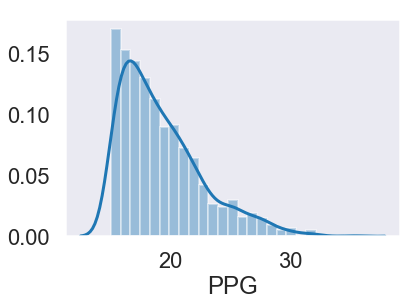

In [346]:
sns.distplot(scrubsDF.PPG)

In [347]:
starsDF = MainDF.loc[MainDF['PPG'] > 20]


In [348]:
Y = starsDF
starsmodel = ols(formula = 'PPG~MPG+PACE+HeightxWeight+agexcareer+PG+SG+SF+PF', data = Y).fit()
starsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     11.42
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           1.12e-14
Time:                        06:47:44   Log-Likelihood:                -987.30
No. Observations:                 423   AIC:                             1993.
Df Residuals:                     414   BIC:                             2029.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -26.4941      6.245     -4.243      0.000     -38.769     -14.219
MPG               0.3843      0.059      6.472      0.000       0.268       0.501
PACE              0.2646      0.047      5.603      0.000       0.172       0.357
HeightxWeight     0.0004   7.79e-05      5.325      0.000       0.000       0.001
agexcareer        0.0039      0.001      3.089      0.002       0.001       0.006
PG                2.8308      0.783      3.615      0.000       1.291       4.370
SG                2.1863      0.611      3.577      0.000       0.985       3.388
SF                1.3301      0.550      2.418      0.016       0.249       2.411
PF               -0.3303      0.520     -0.635      0.526      -1.353       0.693
==============================================================================
Omnibus:                       45.160   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.845
Skew:                           0.813   Prob(JB):                     2.75e-13
Kurtosis:                       3.797   Cond. No.                     1.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [361]:
ppg10DF.shape

(2856, 31)

In [362]:
MainDF.corr()

,Year_x,Age,G,GS,MP,PER,AST,TOV,STL,BLK,TRB,PTS,FG%,PPG,MPG,PACE,height_x,weight_x,HeightxWeight,year_start,year_end,career,agexcareer,C,PF,PG,SF,SG
Year_x,1.000000,-0.057024,-0.004593,-0.000693,-0.017712,0.038661,0.003086,-0.038981,-0.038802,-0.012248,0.003435,0.030220,0.073872,0.042490,-0.018821,0.407553,0.022757,0.066640,0.056450,0.829492,0.819157,0.026750,0.011480,-0.002284,-0.015121,-0.014761,-0.001792,0.034385
Age,-0.057024,1.000000,-0.054717,-0.007870,-0.026958,-0.074602,0.023656,-0.093362,-0.039383,-0.098551,-0.052329,-0.078328,-0.047943,-0.061306,0.022401,-0.089890,-0.044789,-0.085502,-0.078205,-0.552522,-0.306060,0.902724,0.922448,0.006862,0.012038,0.003582,-0.011770,-0.011094
G,-0.004593,-0.054717,1.000000,0.566626,0.808512,0.340610,0.479944,0.643412,0.641147,0.404347,0.626321,0.657557,0.226734,0.392933,0.467723,0.017601,0.013437,0.020708,0.018502,-0.000613,0.166078,-0.005845,-0.022801,-0.023367,0.002326,-0.014915,0.019449,0.016763
GS,-0.000693,-0.007870,0.566626,1.000000,0.850223,0.503713,0.596349,0.749707,0.690284,0.453189,0.695128,0.778117,0.241793,0.703170,0.802618,0.010338,0.050636,0.053426,0.054563,-0.052652,0.179869,0.093190,0.057016,0.008619,-0.022315,-0.001525,0.019666,-0.003855
MP,-0.017712,-0.026958,0.808512,0.850223,1.000000,0.571486,0.693921,0.867227,0.826722,0.447538,0.749767,0.911953,0.230703,0.775841,0.864820,0.005773,-0.031188,-0.029665,-0.033430,-0.057067,0.210343,0.075370,0.036147,-0.105627,-0.010607,0.016380,0.050604,0.050011
PER,0.038661,-0.074602,0.340610,0.503713,0.571486,1.000000,0.483260,0.607572,0.525534,0.415270,0.585182,0.717109,0.547124,0.772764,0.620899,0.042929,0.075308,0.101192,0.099606,0.011281,0.245672,0.038241,-0.003756,0.035417,0.083538,0.013453,-0.061350,-0.073455
AST,0.003086,0.023656,0.479944,0.596349,0.693921,0.483260,1.000000,0.809354,0.749993,0.038688,0.289250,0.679947,-0.011825,0.615453,0.645523,0.034622,-0.369223,-0.317919,-0.342210,-0.049896,0.158216,0.093968,0.066412,-0.258191,-0.171911,0.468785,-0.069537,0.031466
TOV,-0.038981,-0.093362,0.643412,0.749707,0.867227,0.607572,0.809354,1.000000,0.785537,0.356089,0.630563,0.889409,0.170876,0.802001,0.782506,0.037134,-0.101635,-0.057249,-0.071312,-0.044142,0.191463,0.020090,-0.017753,-0.108153,-0.046031,0.169036,-0.021729,0.006823
STL,-0.038802,-0.039383,0.641147,0.690284,0.826722,0.525534,0.749993,0.785537,1.000000,0.253472,0.524483,0.762019,0.093060,0.657404,0.729837,0.044702,-0.204699,-0.193437,-0.206661,-0.055117,0.160173,0.040003,0.008651,-0.222694,-0.088297,0.164987,0.056321,0.091424
BLK,-0.012248,-0.098551,0.404347,0.453189,0.447538,0.415270,0.038688,0.356089,0.253472,1.000000,0.741566,0.380605,0.424770,0.297064,0.357174,0.015739,0.449339,0.400284,0.431968,-0.002155,0.147979,-0.014656,-0.038460,0.401100,0.135278,-0.280902,-0.064961,-0.193021


In [363]:
ppgless15 = MainDF.loc[MainDF.PPG < 15]

In [374]:
X = ppgless15
ols_ppgL15 = ols(formula = 'PPG~MPG+PACE+HeightxWeight+agexcareer+PG+SG+SF+PF' , data = X).fit()
ols_ppgL15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     3175.
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:59:12   Log-Likelihood:                -13135.
No. Observations:                6810   AIC:                         2.629e+04
Df Residuals:                    6801   BIC:                         2.635e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.9288      0.714    -12.505      0.000     -10.328      -7.529
MPG               0.4041      0.003    156.548      0.000       0.399       0.409
PACE              0.0843      0.007     11.680      0.000       0.070       0.099
HeightxWeight -5.768e-07   9.94e-06     -0.058      0.954   -2.01e-05    1.89e-05
agexcareer       -0.0017      0.000    -12.114      0.000      -0.002      -0.001
PG                0.2579      0.095      2.719      0.007       0.072       0.444
SG                0.6204      0.084      7.376      0.000       0.455       0.785
SF                0.3141      0.074      4.217      0.000       0.168       0.460
PF                0.4413      0.064      6.885      0.000       0.316       0.567
==============================================================================
Omnibus:                       58.933   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.515
Skew:                           0.008   Prob(JB):                     2.99e-21
Kurtosis:                       3.577   Cond. No.                     7.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

SyntaxError: invalid syntax (<ipython-input-376-28d54d881a34>, line 1)